SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [32]:
from sklearn.datasets import make_classification

In [33]:
X, y = make_classification(
    n_samples=1000,               # Total number of samples in the dataset
    n_features=2,                 # Number of features (or input variables) for each sample
    n_clusters_per_class=1,       # Number of clusters per class (controls the separation of classes)
    weights=[0.90],               # Relative weights of the classes (class distribution)
    random_state=12,              # Seed for random number generation
    n_redundant=0                 # Number of redundant features (features generated as linear combinations)
)


In [34]:
import pandas as pd  # Import the pandas library and give it the alias 'pd'

# Create a DataFrame 'df1' using the data in array 'X'. Set column names as 'f1' and 'f2'.
df1 = pd.DataFrame(X, columns=['f1', 'f2'])

# Create another DataFrame 'df2' using the data in array 'y'. Set column name as 'target'.
df2 = pd.DataFrame(y, columns=['target'])

# Concatenate (combine) the DataFrames 'df1' and 'df2' along the columns (axis=1).
# This creates a new DataFrame 'final_df' with the features from 'df1' and the target from 'df2'.
final_df = pd.concat([df1, df2], axis=1)

# Display the first few rows of the combined DataFrame 'final_df'.
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [35]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

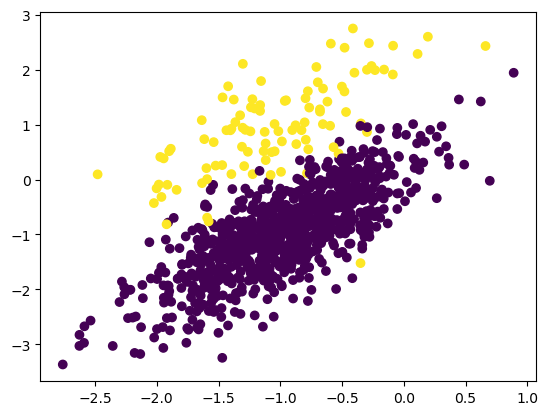

In [36]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'],c = final_df['target'])

In [37]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
##Transform the dataset
oversample = SMOTE()  # Create an instance of the SMOTE class

# Apply SMOTE to oversample the dataset. The input features are 'f1' and 'f2',
# and the target variable is 'target' from the DataFrame 'final_df'.
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])


In [40]:
X.shape

(1800, 2)

In [41]:
y.shape

(1800,)

In [42]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [43]:
len(y[y==0])

900

In [44]:
len(y[y==1])

900

In [45]:
# Create a DataFrame 'df1' using the oversampled features 'X'.
# Set column names as 'f1' and 'f2'.
df1 = pd.DataFrame(X, columns=['f1', 'f2'])

# Create another DataFrame 'df2' using the oversampled target values 'y'.
# Set column name as 'target'.
df2 = pd.DataFrame(y, columns=['target'])

# Concatenate (combine) the DataFrames 'df1' and 'df2' along the columns (axis=1).
# This creates a new DataFrame 'oversample' with the oversampled features and target values.
oversample = pd.concat([df1, df2], axis=1)


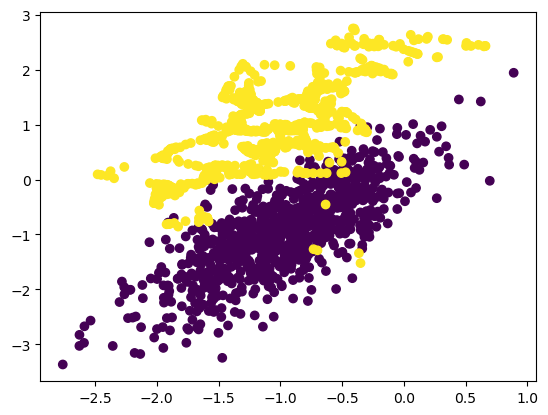

In [46]:
plt.scatter(oversample['f1'], oversample['f2'],c = oversample['target'])